<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the library for NFL Data
!pip install nfl_data_py

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import axes
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image

import nfl_data_py as nfl

#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data import and cleaning
years = [2022]

df2022 = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df2022.reset_index(drop=True, inplace=True)
df2022 = df2022.loc[df2022.season_type=='REG']
df2022.loc[df2022['pass']==1, 'play_type'] = 'pass'
df2022.loc[df2022["rush"]==1, 'play_type'] = 'run'

df2022.reset_index(drop=True, inplace=True)
df2022.head()

2022 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [ ]:
#Data import and cleaning
years = [2023]

df = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df.reset_index(drop=True, inplace=True)
df = df.loc[df.season_type=='REG']
#df = df.loc[(df.play_type.isin(['no_play','pass','run', '']))]
df.loc[df['pass']==1, 'play_type'] = 'pass'
df.loc[df["rush"]==1, 'play_type'] = 'run'

df.reset_index(drop=True, inplace=True)

2023 done.
Downcasting floats.


In [ ]:
# CODE WIP
# df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

# # Calculate the total count for each 'penalty_team'
# team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# # Sort the DataFrame by the total count in descending order
# sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

# sorted_df.head()

down,1.0,2.0,3.0,4.0
penalty_team,,,,
BUF,17.0,13.0,14.0,9.0
TB,18.0,13.0,8.0,8.0
SF,14.0,14.0,12.0,7.0
IND,10.0,15.0,14.0,8.0
ARI,17.0,13.0,10.0,6.0


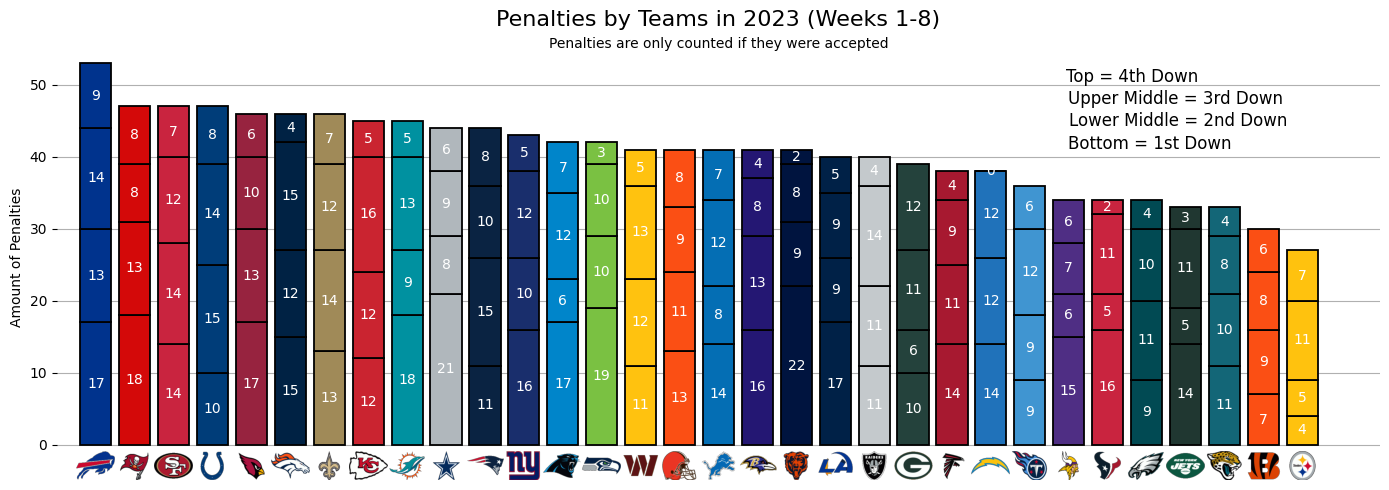

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

# Color
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

team_colors = [teamcolor.get(team) for team in sorted_df.index]

fig, ax = plt.subplots(figsize = (14,5))

index = np.arange(len(sorted_df.index))

lwidth = 1.3

ax.bar(index, down1, color=team_colors, edgecolor='k', linewidth=lwidth, zorder = 4)
ax.bar(index, down2, bottom=down1, color=team_colors,edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down3, bottom=[d1 + d2 for d1, d2 in zip(down1, down2)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down4, bottom=[d1 + d2 + d3 for d1, d2, d3 in zip(down1, down2, down3)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)

for i in range(len(sorted_df.index)):
    # Calculate the total height of the bar for this team
    total_height = down1[i] + down2[i] + down3[i] + down4[i]

    # Add labels for each segment (1st, 2nd, 3rd, 4th down)
    ax.text(i, down1[i] / 2, str(int(down1[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] / 2), str(int(down2[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] / 2), str(int(down3[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] + down4[i] / 2), str(int(down4[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)

for i in range(len(sorted_df.index)):
    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.50, -5 ,-1], aspect='auto', zorder=3)


# Add labels
ax.set_ylabel('Amount of Penalties')

# Add a main title
ax.set_title('Penalties by Teams in 2023 (Weeks 1-8)', fontsize=16)

# Add a subtitle
subtitle = 'Penalties are only counted if they were accepted'
plt.text(0.5, 0.97, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.text(0.863, 0.925, "Top = 4th Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.927, 0.875, "Upper Middle = 3rd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.93, 0.825, "Lower Middle = 2nd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.888, 0.775, "Bottom = 1st Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, (team_totals).values.max() + 4])
plt.xlim([-1, 33])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(0, 32, 1))

ax.grid(zorder=0)
ax.xaxis.set_visible(False)


# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
pass_df = df[df['play_type'] == "pass"]

pass_epa_score = pass_df.groupby('posteam')['qb_epa'].sum().reset_index()
tot_pass_plays = pass_df.groupby('posteam').size().reset_index(name = "pass_plays")

pass_epa_score["pass_epa_per_play"] = pass_epa_score["qb_epa"] / tot_pass_plays["pass_plays"]


score = df[["home_team", "away_team", "home_score", "away_score"]]
score = score.drop_duplicates()

tot_home_score = score.groupby('home_team')['home_score'].sum().reset_index()
tot_away_score = score.groupby('away_team')['away_score'].sum().reset_index()
games = pass_df.groupby('posteam')['week'].max().reset_index()

pass_epa_score["avg_pts"] = (tot_home_score["home_score"] + tot_away_score["away_score"]) / games["week"]

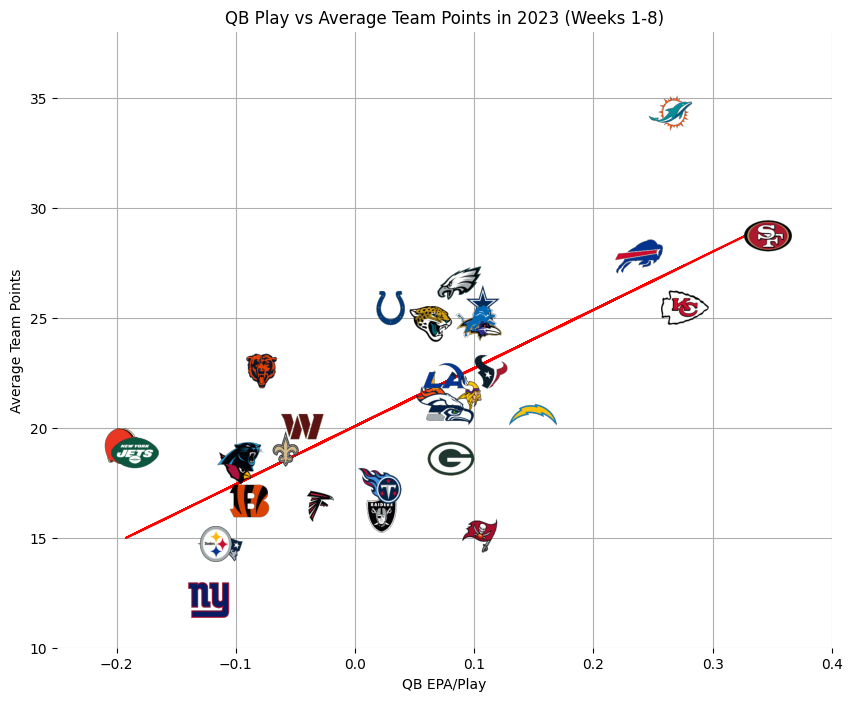

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot with markers replaced by logos

logo_images = []

for team in pass_epa_score["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

for i in range(len(pass_epa_score["posteam"])):
    x, y = pass_epa_score["pass_epa_per_play"][i], pass_epa_score["avg_pts"][i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.02, x+0.02, y-0.8, y+0.8], aspect='auto', zorder=3)

# Trendline
coefficients = np.polyfit(pass_epa_score["pass_epa_per_play"], pass_epa_score["avg_pts"], 1)
trend_line = coefficients[0] * np.array(pass_epa_score["pass_epa_per_play"]) + coefficients[1]

plt.plot(pass_epa_score["pass_epa_per_play"], trend_line, color='red')


plt.xlabel('QB EPA/Play')
plt.ylabel('Average Team Points')
plt.title('QB Play vs Average Team Points in 2023 (Weeks 1-8)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.ylim(10, 38)
plt.xlim(-0.25,0.4)

plt.show()

In [ ]:
pass_filt = df[df['pass_location'].isin(["middle", "right", "left"])]

pass_loc = pass_filt[['posteam', 'pass_location']]

total_pass = pass_loc.groupby('posteam').value_counts()
pass_group = pass_loc.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")
total_pass = pass_group.groupby("posteam")["count"].sum().reset_index()

total_pass = total_pass.loc[np.repeat(total_pass.index, 3)].reset_index(drop=True)

tot_pass = pd.DataFrame(total_pass)
pass_group["percent_loc"] = pass_group["count"] / tot_pass["count"] * 100

# Pivot the DataFrame to separate pass_location into columns
piv_pass_group = pass_group.pivot(index='posteam', columns='pass_location', values='percent_loc')

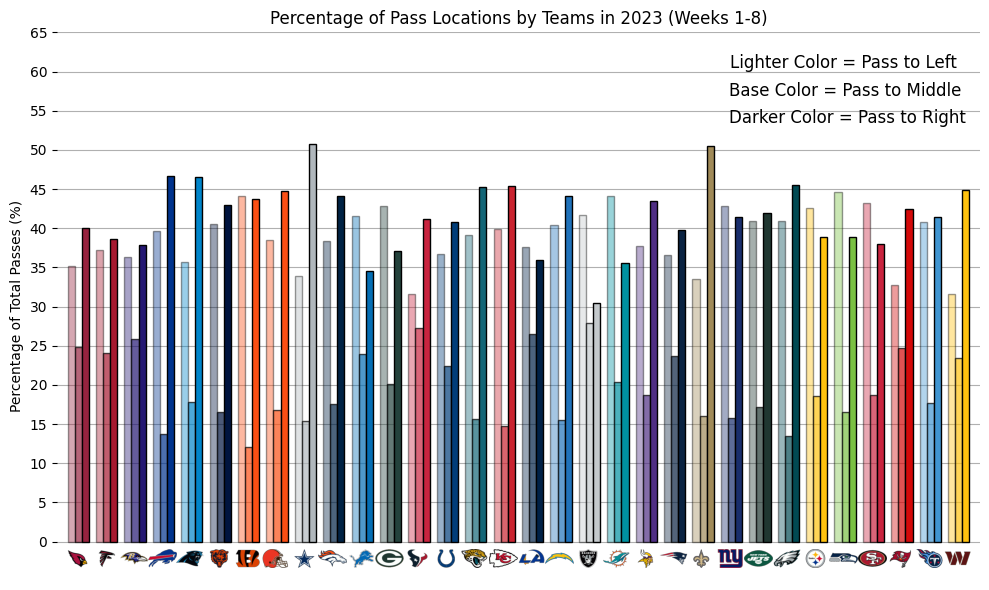

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

bar_colors = [teamcolor.get(team) for team in piv_pass_group.index] # Get the list of teams and their corresponding index

teams = piv_pass_group.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group[location]
    if (location == "left"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha=0.4,edgecolor='black', linewidth=1, zorder = 5)
    if (location == "middle"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha=0.7, edgecolor='black', linewidth=1, zorder = 5)
    if (location == "right"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha=1,edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2023 (Weeks 1-8)')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.975, 0.96, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.98, 0.91, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.985, 0.86, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#2022 Bias Data
pass_filt2022 = df2022[df2022['pass_location'].isin(["middle", "right", "left"])]

pass_loc2022 = pass_filt2022[['posteam', 'pass_location']]

total_pass2022 = pass_loc2022.groupby('posteam').value_counts()

pass_group2022 = pass_loc2022.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

total_pass2022 = pass_group2022.groupby("posteam")["count"].sum().reset_index()

total_pass2022 = total_pass2022.loc[np.repeat(total_pass2022.index, 3)].reset_index(drop=True)

tot_pass2022 = pd.DataFrame(total_pass2022)

pass_group2022["percent_loc"] = pass_group2022["count"] / tot_pass2022["count"] * 100

# Pivot the DataFrame to separate pass_location into columns
piv_pass_group2022 = pass_group2022.pivot(index='posteam', columns='pass_location', values='percent_loc')

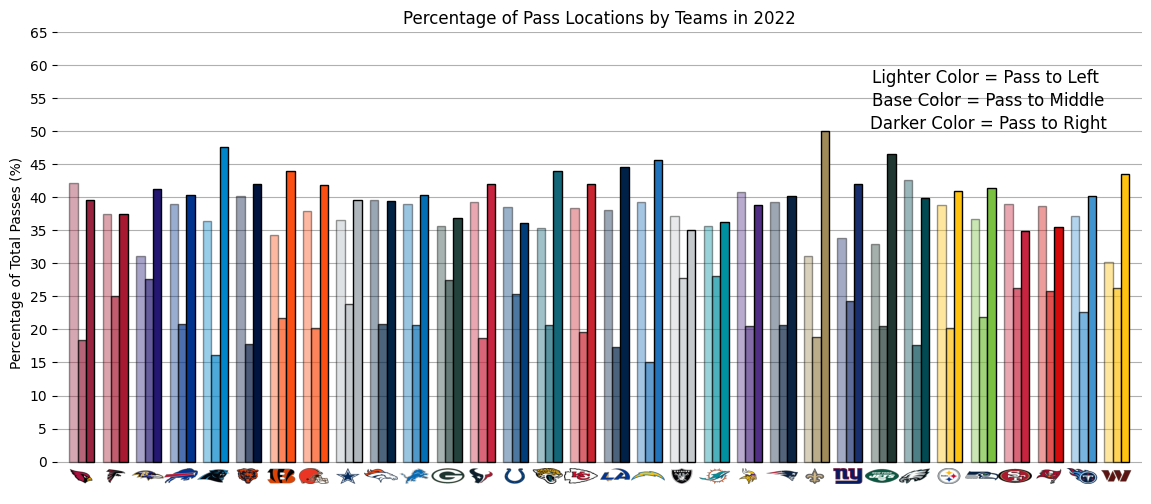

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

bar_colors = [teamcolor.get(team) for team in piv_pass_group2022.index]

# Get the list of teams and their corresponding index
teams = piv_pass_group2022.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group2022[location]
    if (location == "left"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha= 0.4, edgecolor='black', linewidth=1, zorder = 5)
    if (location == "middle"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha= 0.7, edgecolor='black', linewidth=1, zorder = 5)
    if (location == "right"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, alpha= 1, edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2022')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
#plt.tight_layout()
plt.show()

In [ ]:
pass_group["percent_diff"] = pass_group["percent_loc"] - pass_group2022["percent_loc"]

# Pivot the DataFrame to separate pass_location into columns
piv_passdif = pass_group.pivot(index='posteam', columns='pass_location', values='percent_diff')

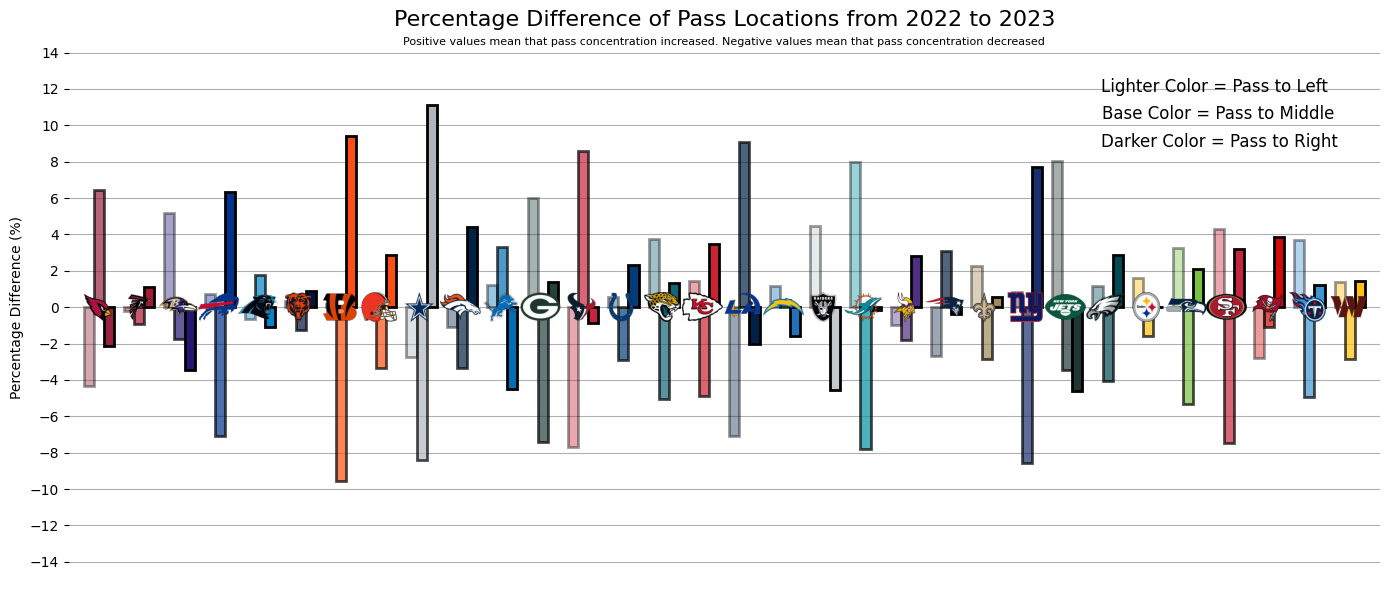

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

bar_colors = [teamcolor.get(team) for team in piv_passdif.index]

# Get the list of teams and their corresponding index

logo_images = []

for team in piv_passdif.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_passdif[location]
    if (location == "left"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, edgecolor='black', alpha = 0.4, linewidth=2, zorder = 5)
    if (location == "middle"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, edgecolor='black', alpha = 0.7, linewidth=2, zorder = 5)
    if (location == "right"):
      ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=bar_colors, edgecolor='black', alpha = 1, linewidth=2, zorder = 5)


for i in range(len(teams)):
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -0.8 ,0.8], aspect='auto', zorder=7)


ax.set_ylabel('Percentage Difference (%)')

# Add a main title
ax.set_title('Percentage Difference of Pass Locations from 2022 to 2023', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that pass concentration increased. Negative values mean that pass concentration decreased'
plt.text(0.5, 0.98, subtitle, fontsize=8, ha='center', transform=ax.transAxes)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.ylim([-15, 15])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(-14, 16, 2))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
qb2023 = nfl.import_weekly_data([2023])

qb2023 = qb2023[qb2023["position"] == "QB"]

Downcasting floats.


In [ ]:
qb2023 = qb2023[["player_name", "recent_team", "attempts", "passing_yards", "passing_air_yards", "passing_yards_after_catch", "sacks", "passing_epa"]]
qb2023["passing_plays"] = qb2023["attempts"] + qb2023["sacks"]

<ipython-input-294-eeff0ccc5dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qb2023["passing_plays"] = qb2023["attempts"] + qb2023["sacks"]


In [ ]:
# Group and aggregate the data
group_qb2023 = qb2023.groupby("player_name").agg({
    "passing_plays": "sum",
    "attempts": "sum",
    "passing_epa": "sum",
    "passing_air_yards": "sum",
    "passing_yards": "sum",
    "passing_yards_after_catch": "sum",
    "recent_team": "first"  # Include the team information
}).reset_index()

group_qb2023["percent_yac"] = group_qb2023["passing_yards_after_catch"] / group_qb2023["passing_yards"] * 100
group_qb2023["passing_epa_per_play"] = group_qb2023["passing_epa"] / group_qb2023["passing_plays"]
group_qb2023["adot"] = group_qb2023["passing_air_yards"] / group_qb2023["attempts"]


group_qb2023 = group_qb2023[group_qb2023["passing_plays"] > 50].reset_index(drop=True)

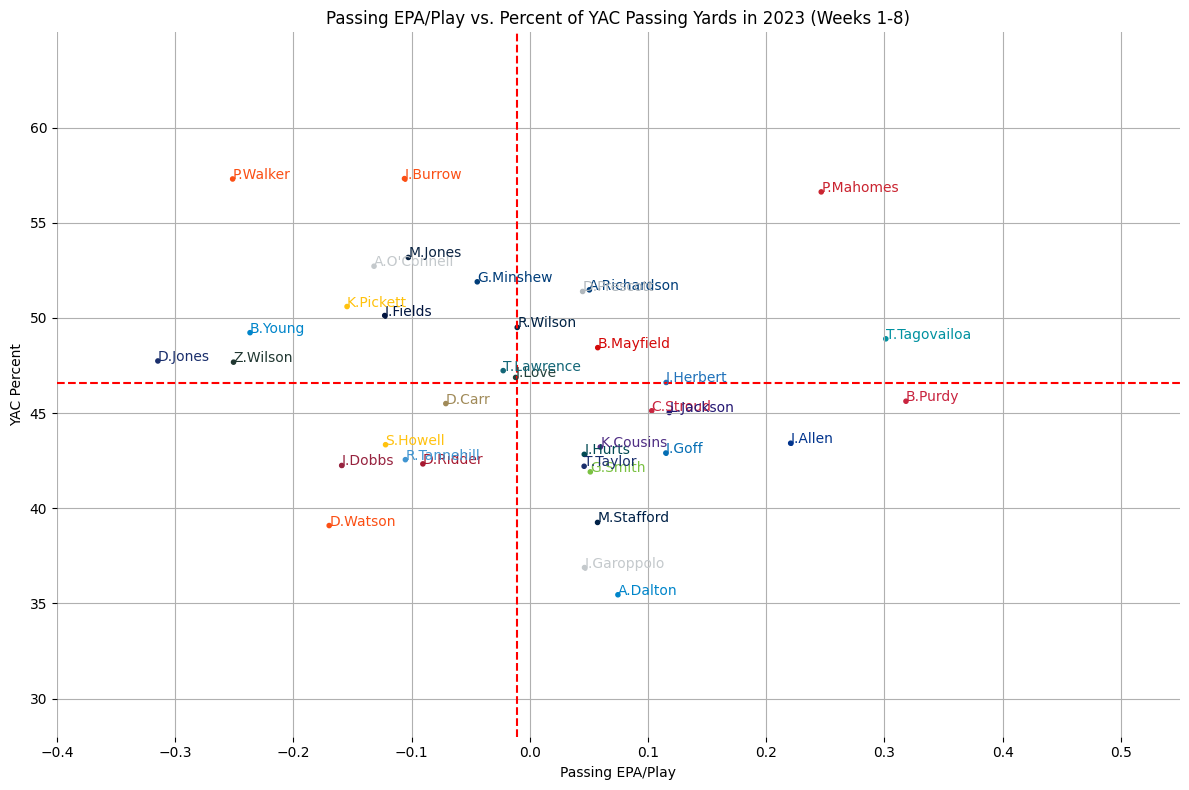

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["percent_yac"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["percent_yac"][i]), color=qb_colors[i])

mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["percent_yac"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([28, 65])
plt.xlim([-0.4, 0.55])
plt.yticks(np.arange(30, 65, 5))
plt.xticks(np.arange(-0.4, 0.55, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('YAC Percent')
ax.set_title('Passing EPA/Play vs. Percent of YAC Passing Yards in 2023 (Weeks 1-8)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

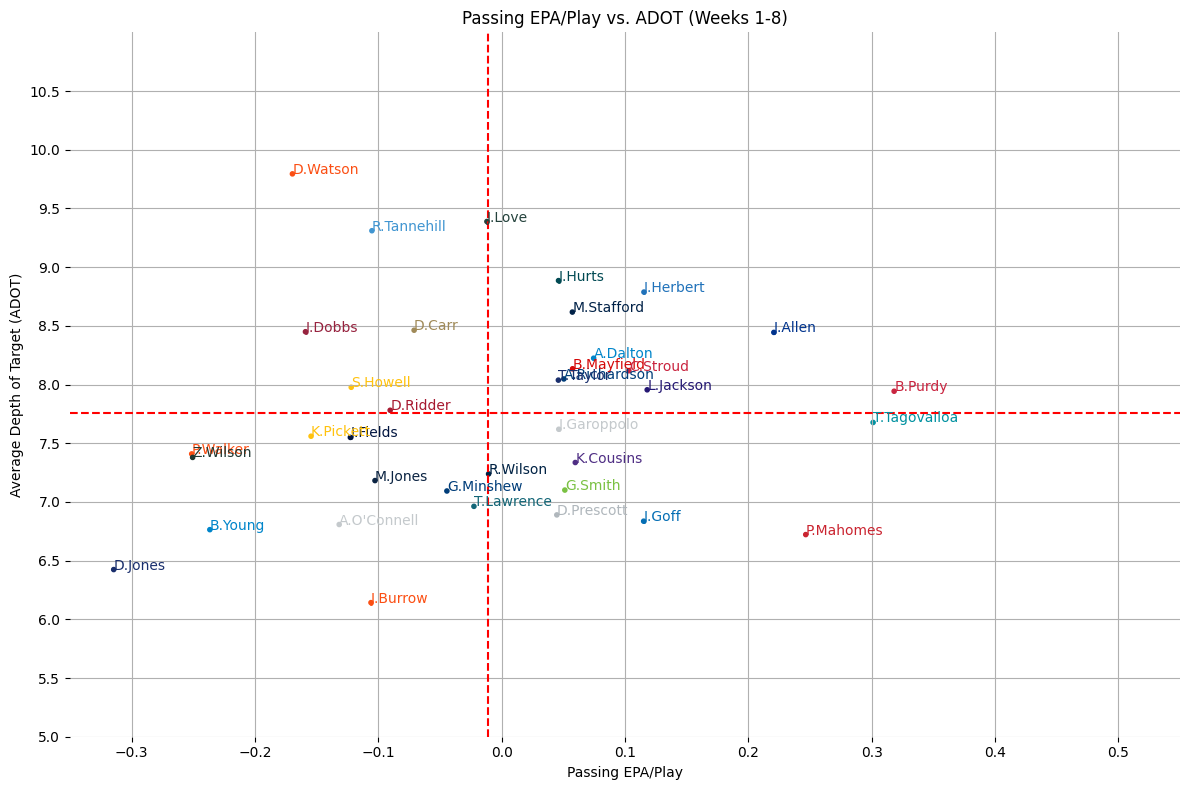

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["adot"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["adot"][i]), color=qb_colors[i])

# Mean Lines
mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["adot"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# Axes
plt.ylim([5, 11])
plt.xlim([-0.35, 0.55])
plt.yticks(np.arange(5, 11, 0.5))
plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('Average Depth of Target (ADOT)')
ax.set_title('Passing EPA/Play vs. ADOT (Weeks 1-8)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
ngs_receiving2023 = nfl.import_ngs_data("receiving", [2023])

ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["week"] == 0].reset_index(drop=True)
ngs_receiving2023 = ngs_receiving2023[ngs_receiving2023["targets"] > 15].reset_index(drop=True)


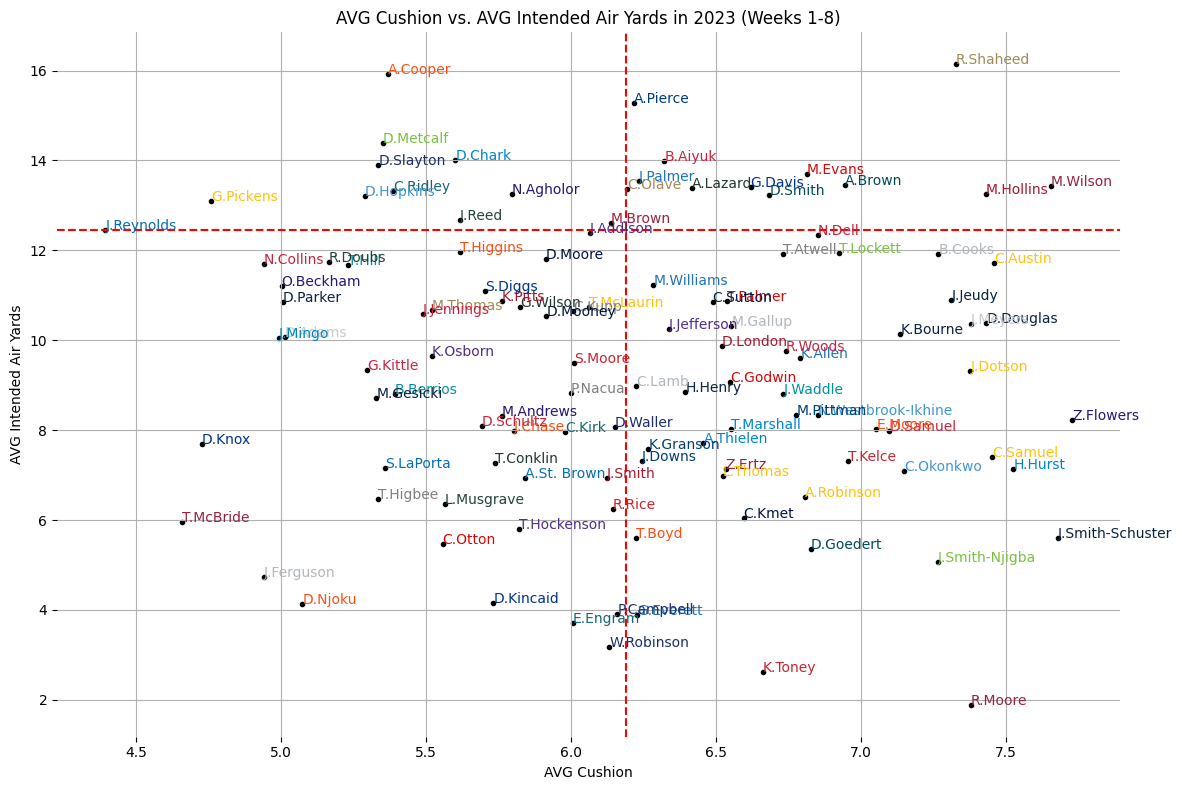

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

rec_colors = [teamcolor.get(team, "gray") for team in ngs_receiving2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_receiving2023["avg_cushion"], ngs_receiving2023["avg_intended_air_yards"], marker='.', color="black")

for i, player_name in enumerate(ngs_receiving2023["player_short_name"]):
    ax.annotate(player_name, (ngs_receiving2023["avg_cushion"][i], ngs_receiving2023["avg_intended_air_yards"][i]), color=rec_colors[i])

mean_x = np.mean(ngs_receiving2023["avg_cushion"])
mean_y = np.mean(ngs_receiving2023["avg_intended_air_yards"][i])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# plt.ylim([5, 11])
# plt.xlim([-0.35, 0.55])
# plt.yticks(np.arange(5, 11, 0.5))
# plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('AVG Cushion')
ax.set_ylabel('AVG Intended Air Yards')
ax.set_title('AVG Cushion vs. AVG Intended Air Yards in 2023 (Weeks 1-8)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
ngs_passing2023 = nfl.import_ngs_data("passing", [2023])

ngs_passing2023 = ngs_passing2023[ngs_passing2023["week"] == 0].reset_index(drop=True)
ngs_passing2023 = ngs_passing2023[ngs_passing2023["attempts"] > 15].reset_index(drop=True)

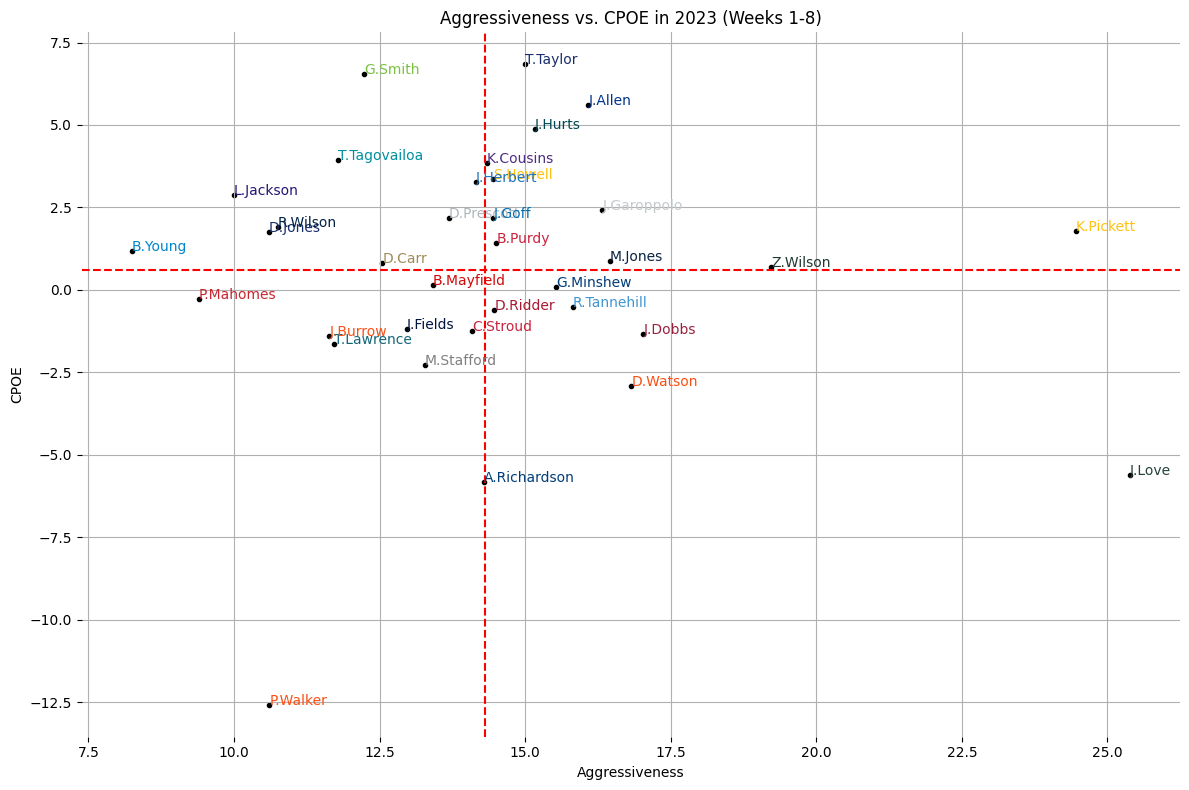

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

pass_colors = [teamcolor.get(team, "gray") for team in ngs_passing2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs_passing2023["aggressiveness"], ngs_passing2023["completion_percentage_above_expectation"], marker='.', color="black")

for i, player_name in enumerate(ngs_passing2023["player_short_name"]):
    ax.annotate(player_name, (ngs_passing2023["aggressiveness"][i], ngs_passing2023["completion_percentage_above_expectation"][i]), color=pass_colors[i])

mean_x = np.mean(ngs_passing2023["aggressiveness"])
mean_y = np.mean(ngs_passing2023["completion_percentage_above_expectation"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')


ax.set_xlabel('Aggressiveness')
ax.set_ylabel('CPOE')
ax.set_title('Aggressiveness vs. CPOE in 2023 (Weeks 1-8)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
pbp = nfl.import_pbp_data(years, downcast=True)
pd.set_option('display.max_columns', None)

2023 done.
Downcasting floats.


In [ ]:
pbp = pbp[pbp["play_type"].isin(["pass", "run"])].reset_index(drop=True)

per_play = pbp.groupby(["posteam", "play_type"]).size().reset_index()

group_pbp = pbp.groupby(["posteam", "play_type"])["epa"].sum().reset_index()

pass_pbp = group_pbp[group_pbp["play_type"] == "pass"].reset_index(drop=True)
run_pbp = group_pbp[group_pbp["play_type"] == "run"].reset_index(drop=True)

per_play = per_play.rename(columns={0: "play_count"})

pass_play = per_play[per_play["play_type"] == "pass"].reset_index(drop=True)
run_play = per_play[per_play["play_type"] == "run"].reset_index(drop=True)

pass_pbp["pass_epa_per_play"] = pass_pbp["epa"] / pass_play["play_count"]
run_pbp["run_epa_per_play"] = run_pbp["epa"] / run_play["play_count"]

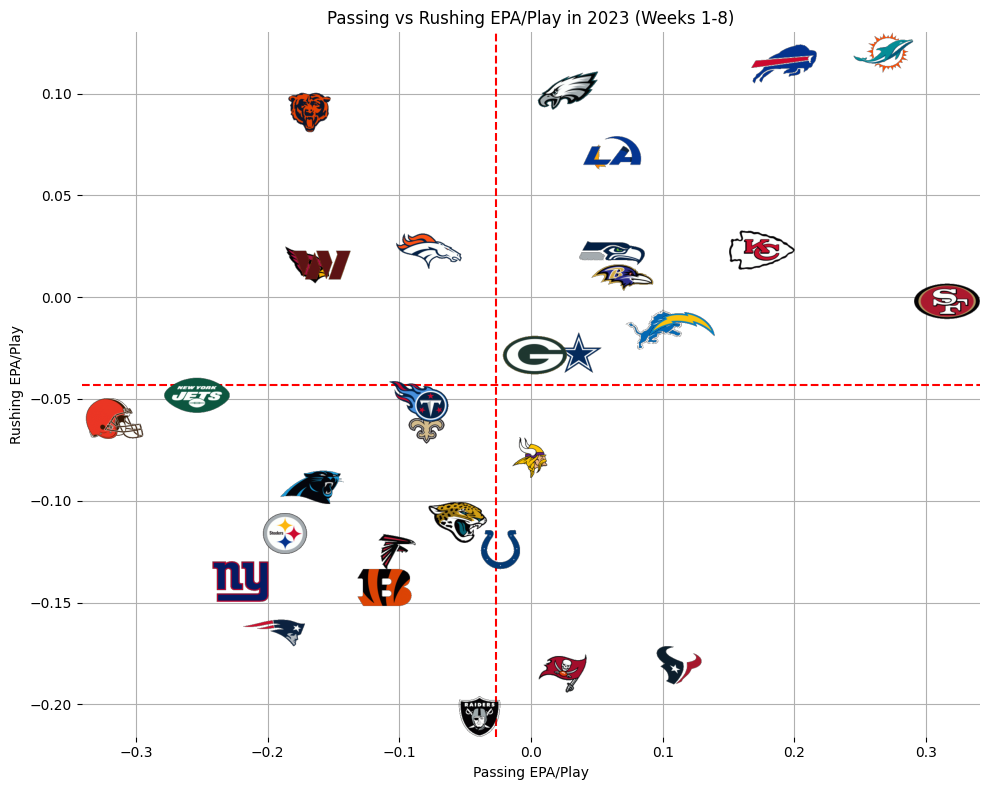

In [ ]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Scatter plot with markers replaced by logos
for i in range(len(pass_pbp["pass_epa_per_play"])):
    x, y, team = pass_pbp["pass_epa_per_play"][i], run_pbp["run_epa_per_play"][i], pass_pbp["posteam"][i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x-0.025, x+0.025, y-0.01, y+0.01], aspect='auto', zorder=3)

mean_x = np.mean(pass_pbp["pass_epa_per_play"])
mean_y = np.mean(run_pbp["run_epa_per_play"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.xlabel('Passing EPA/Play')
plt.ylabel('Rushing EPA/Play')
plt.title('Passing vs Rushing EPA/Play in 2023 (Weeks 1-8)')
plt.grid(True)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

What percentage teams pass out of each Formation and Personel

In [ ]:
form_data = nfl.import_pbp_data([2023], downcast=True)
form_data = form_data[["play_type", "offense_formation"]]
form_data = form_data[(form_data["play_type"] == "pass") | (form_data["play_type"] == "run")]

form_data_group = form_data.groupby(["play_type","offense_formation"]).size().reset_index(name = "count")
pass_form = form_data_group[form_data_group["play_type"] == "pass"]
pass_percent_data = form_data_group.groupby("offense_formation")["count"].sum().reset_index()

pass_percent_data["pass_percentage"] = (pass_form["count"] / pass_percent_data["count"]) * 100
pass_percent_data = pass_percent_data.sort_values(by= "pass_percentage", ascending=False).reset_index()

2023 done.
Downcasting floats.


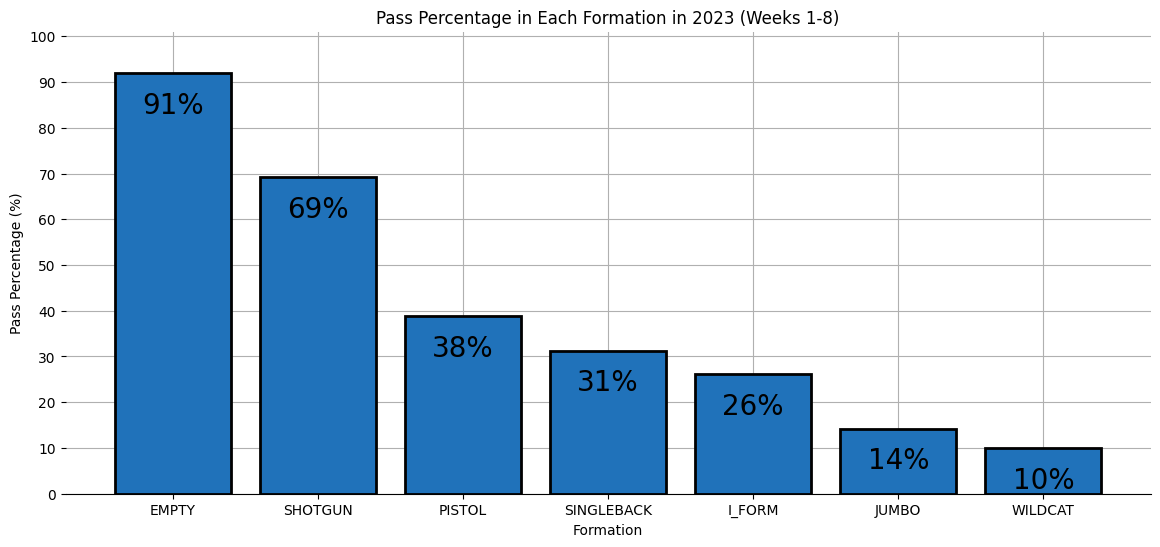

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(pass_percent_data["offense_formation"], pass_percent_data["pass_percentage"], width = .8, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

for i in range(len(pass_percent_data)):
  plt.text(i, pass_percent_data["pass_percentage"][i]-7, f'{int(pass_percent_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Formation')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Formation in 2023 (Weeks 1-8)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [ ]:
pers_data = nfl.import_pbp_data([2023], downcast=True)
pers_data = pers_data[["play_type", "offense_personnel"]]
pers_data = pers_data[(pers_data["play_type"] == "pass") | (pers_data["play_type"] == "run")]



pers_data_group = pers_data.groupby(["play_type","offense_personnel"]).size().reset_index(name = "count").sort_values(by = "count")
pers_data_group = pers_data_group[pers_data_group["count"] > 10]
pers_data_group.head(100)

pers_form = pers_data_group[pers_data_group["play_type"] == "pass"].reset_index(drop=True)
pass_pers_percent = pers_data_group.groupby("offense_personnel")["count"].sum().reset_index()

personnel_data = pers_form.merge(pass_pers_percent, on='offense_personnel', suffixes=('_pass', '_play_total'))
personnel_data["pass_percentage"] = (personnel_data["count_pass"] / personnel_data["count_play_total"] * 100)
personnel_data = personnel_data.sort_values(by = "pass_percentage", ascending = False).reset_index()

personnel_data = personnel_data[personnel_data.index > 2].reset_index()

2023 done.
Downcasting floats.


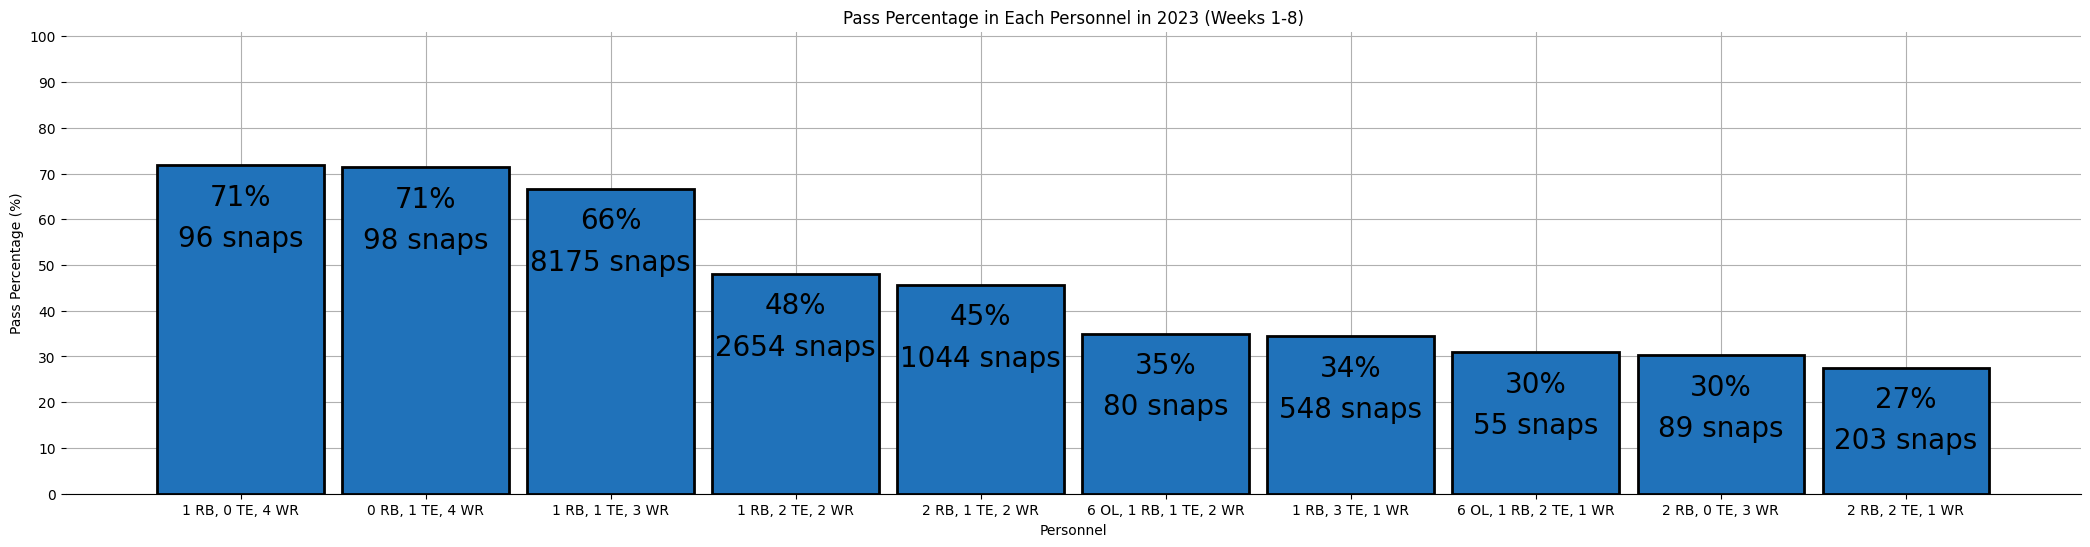

In [ ]:
plt.figure(figsize=(26, 6))

plt.bar(personnel_data["offense_personnel"], personnel_data["pass_percentage"], width = 0.9, color = (32/255, 114/255, 186/255), edgecolor = "k", linewidth = 2, zorder = 5)

for i in range(len(personnel_data)):
  plt.text(i, personnel_data["pass_percentage"][i]-7, f'{int(personnel_data["pass_percentage"][i])}%', ha='center', va='center', color='k', fontsize=20, zorder = 10)
  plt.text(i, personnel_data["pass_percentage"][i]-16, f'{int(personnel_data["count_play_total"][i])} snaps', ha='center', va='center', color='k', fontsize=20, zorder = 10)

plt.xlabel('Personnel')
plt.ylabel('Pass Percentage (%)')
plt.title('Pass Percentage in Each Personnel in 2023 (Weeks 1-8)')

plt.grid(True)

plt.ylim(0, 101)
plt.yticks(np.arange(0, 101, 10))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()

In [ ]:
wp4th = nfl.import_pbp_data([2023], downcast=True)

2023 done.
Downcasting floats.


In [ ]:
wp4th = wp4th[wp4th["down"] == 4.0]
wp4th = wp4th[(wp4th["play_type"] == "pass") | (wp4th["play_type"] == "run")]

go4th = wp4th.groupby("posteam")["down"].count().reset_index(name = "total_go4th")
team_wp4th = wp4th.groupby("posteam")["wpa"].sum().reset_index(name = "wp_total")
team_wp4th["total_go4th"] = go4th["total_go4th"]

team_wp4th["avg_wp4th"] = team_wp4th["wp_total"] / team_wp4th["total_go4th"]
team_wp4th = team_wp4th.sort_values("avg_wp4th", ascending=False).reset_index(drop= True)
team_wp4th["avg_wp4th"] = team_wp4th["avg_wp4th"]*100

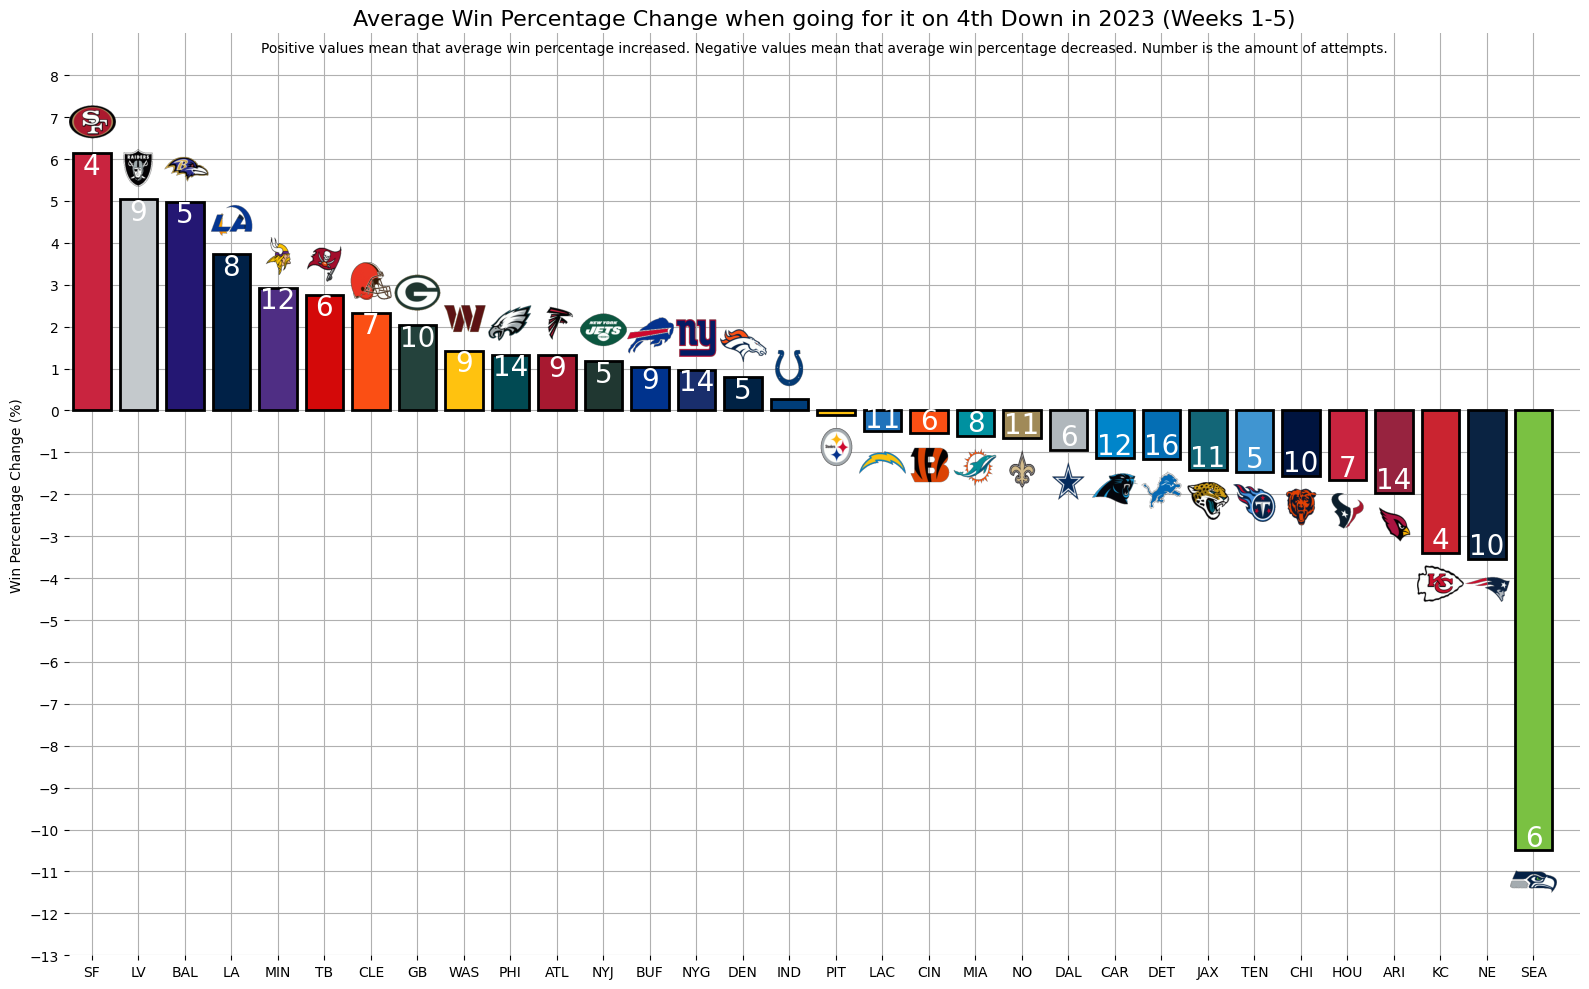

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in team_wp4th["posteam"]]

logo_images = []

for team in team_wp4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(team_wp4th["posteam"], team_wp4th["avg_wp4th"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(team_wp4th["posteam"])):
  if (abs(team_wp4th["avg_wp4th"][i]) < 0.4):
      continue
  if (team_wp4th["avg_wp4th"][i] > 0):
    plt.text(i, team_wp4th["avg_wp4th"][i]-0.3, team_wp4th["total_go4th"][i], ha='center', va='center', color='w', fontsize=20, zorder = 30)
  if (team_wp4th["avg_wp4th"][i] < 0):
    plt.text(i, team_wp4th["avg_wp4th"][i]+0.3, team_wp4th["total_go4th"][i], ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(team_wp4th["posteam"])):

    logo_img = logo_images[i]

    if (team_wp4th["avg_wp4th"][i] > 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, team_wp4th["avg_wp4th"][i] + 0.3 , team_wp4th["avg_wp4th"][i] + 1.2], aspect='auto', zorder=7)
    if (team_wp4th["avg_wp4th"][i] < 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, team_wp4th["avg_wp4th"][i] - 1.2 , team_wp4th["avg_wp4th"][i] - 0.3], aspect='auto', zorder=7)



ax.set_ylabel('Win Percentage Change (%)')

# Add a main title
ax.set_title('Average Win Percentage Change when going for it on 4th Down in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that average win percentage increased. Negative values mean that average win percentage decreased. Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([-13, 9])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(-13, 9, 1))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
conv_4th = nfl.import_pbp_data([2023], downcast=True)

2023 done.
Downcasting floats.


In [ ]:
conv_4th = conv_4th[conv_4th["down"] == 4.0]
conv_4th_group = conv_4th.groupby("posteam")["fourth_down_converted"].sum().reset_index()
fail_4th_group = conv_4th.groupby("posteam")["fourth_down_failed"].sum().reset_index()

conv_4th_group["4th_conv_percent"] = conv_4th_group["fourth_down_converted"] / (conv_4th_group["fourth_down_converted"] + fail_4th_group["fourth_down_failed"]) * 100
conv_4th_group["fourth_total"] = fail_4th_group["fourth_down_failed"] + conv_4th_group["fourth_down_converted"]

final_4th = conv_4th_group.sort_values(by = "4th_conv_percent", ascending = False).reset_index(drop = True)

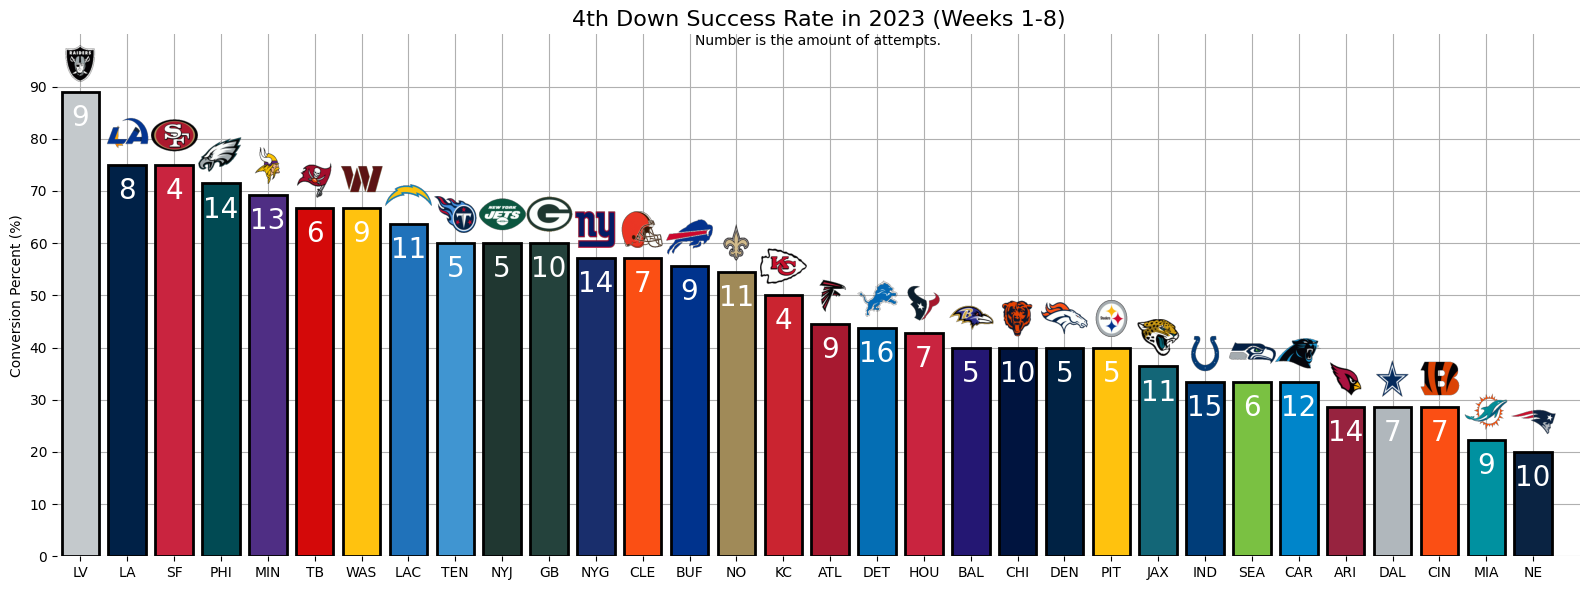

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in final_4th["posteam"]]

logo_images = []

for team in final_4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(final_4th["posteam"], final_4th["4th_conv_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(final_4th["posteam"])):
   plt.text(i, final_4th["4th_conv_percent"][i]-5, int(final_4th["fourth_total"][i]), ha='center', va='center', color='w', fontsize=20, zorder = 30)

# Add logo
for i in range(len(final_4th["posteam"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, final_4th["4th_conv_percent"][i] + 2 , final_4th["4th_conv_percent"][i] + 9], aspect='auto', zorder=7)


ax.set_ylabel('Conversion Percent (%)')

# Add a main title
ax.set_title('4th Down Success Rate in 2023 (Weeks 1-8)', fontsize=16)

# Add a subtitle
subtitle = 'Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 100])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 100, 10))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


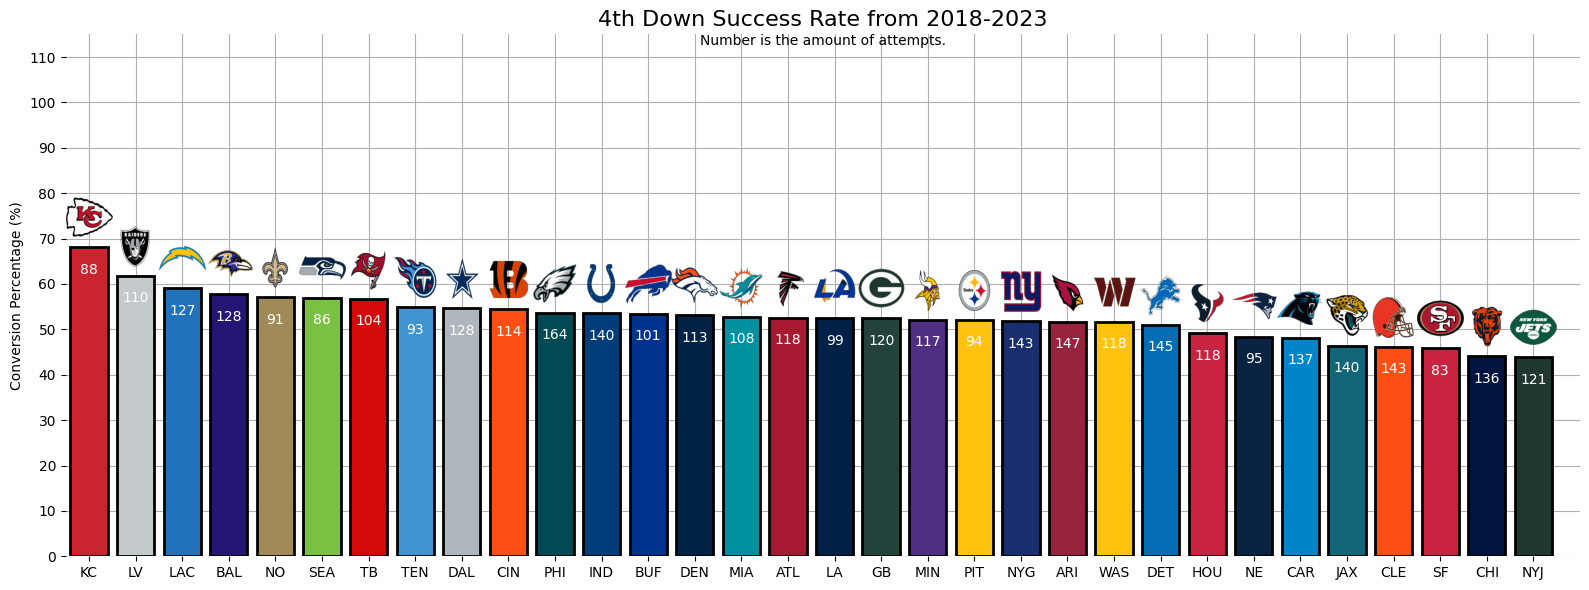

In [ ]:
conv_4th = nfl.import_pbp_data(range(2018,2024), downcast=True)

conv_4th = conv_4th[conv_4th["down"] == 4.0]
conv_4th_group = conv_4th.groupby("posteam")["fourth_down_converted"].sum().reset_index()
fail_4th_group = conv_4th.groupby("posteam")["fourth_down_failed"].sum().reset_index()

conv_4th_group["4th_conv_percent"] = conv_4th_group["fourth_down_converted"] / (conv_4th_group["fourth_down_converted"] + fail_4th_group["fourth_down_failed"]) * 100
conv_4th_group["fourth_total"] = fail_4th_group["fourth_down_failed"] + conv_4th_group["fourth_down_converted"]

final_4th = conv_4th_group.sort_values(by = "4th_conv_percent", ascending = False).reset_index(drop = True)


teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in final_4th["posteam"]]

logo_images = []

for team in final_4th["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(final_4th["posteam"], final_4th["4th_conv_percent"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

# Add count
for i in range(len(final_4th["posteam"])):
   plt.text(i, final_4th["4th_conv_percent"][i]-5, int(final_4th["fourth_total"][i]), ha='center', va='center', color='w', fontsize=10, zorder = 30)

# Add logo
for i in range(len(final_4th["posteam"])):

    logo_img = logo_images[i]

    plt.imshow(logo_img, extent=[i-0.5,i + 0.5, final_4th["4th_conv_percent"][i] + 2 , final_4th["4th_conv_percent"][i] + 11], aspect='auto', zorder=7)


ax.set_ylabel('Conversion Percentage (%)')

# Add a main title
ax.set_title('4th Down Success Rate from 2018-2023', fontsize=16)

# Add a subtitle
subtitle = 'Number is the amount of attempts.'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim([0, 115])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(np.arange(0, 115, 10))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
pass_ngs = nfl.import_ngs_data("passing", [2023])
rec_ngs = nfl.import_ngs_data("receiving", [2023])

pass_ngs = pass_ngs[pass_ngs["week"] == 0]
rec_ngs = rec_ngs[rec_ngs["week"] == 0]

In [ ]:
# Target Percentage

pd.set_option('display.max_rows', None)

attempts = pass_ngs.groupby("team_abbr")["attempts"].sum().reset_index()
attempts = attempts.sort_values(by = "team_abbr")

target_ngs = rec_ngs.sort_values(by = ["team_abbr", "targets"], ascending = [True, False])

target_ngs = target_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
target_ngs = target_ngs[["player_short_name","team_abbr", "targets"]].reset_index(drop=True)

attempts = pd.concat([attempts]*2)
attempts = attempts.sort_values(by='team_abbr').reset_index(drop=True)


target_ngs["target_percent"] = target_ngs["targets"] / attempts["attempts"] * 100
target_ngs["Rank"] = ["rec1", "rec2"]*32

target_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

target_ngs_piv = target_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "target_percent"]).reset_index()

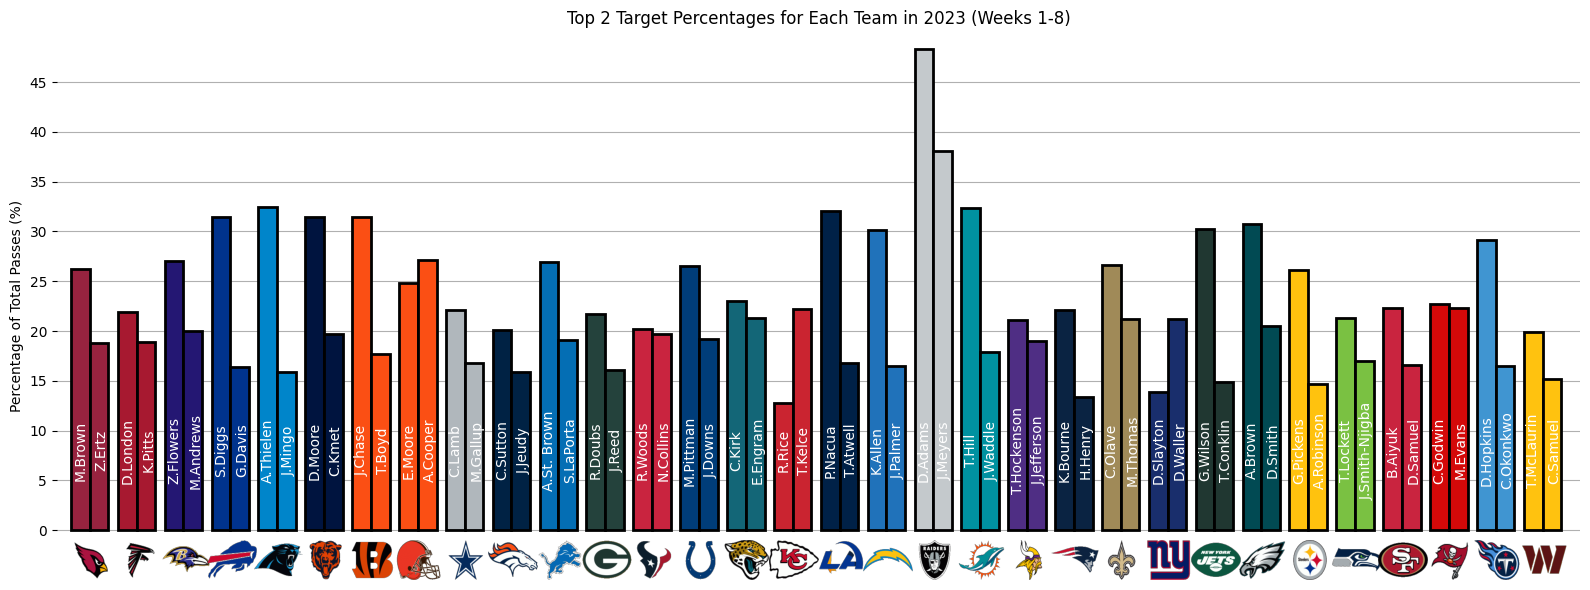

In [ ]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in target_ngs_piv["team_abbr"]]

logo_images = []

for team in target_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = target_ngs_piv["target_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(target_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, target_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, target_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(target_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Top 2 Target Percentages for Each Team in 2023 (Weeks 1-8)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Reception Percentage

pd.set_option('display.max_rows', None)

complete = pass_ngs.groupby("team_abbr")["completions"].sum().reset_index()
complete = complete.sort_values(by = "team_abbr")

recs_ngs = rec_ngs.sort_values(by = ["team_abbr", "receptions"], ascending = [True, False])

recs_ngs = recs_ngs.groupby(by='team_abbr').head(2).sort_values(by='team_abbr')
recs_ngs = recs_ngs[["player_short_name","team_abbr", "receptions"]].reset_index(drop=True)

complete = pd.concat([complete]*2)
complete = complete.sort_values(by='team_abbr').reset_index(drop=True)

recs_ngs["rec_percent"] = recs_ngs["receptions"] / complete["completions"] * 100
recs_ngs["Rank"] = ["rec1", "rec2"]*32

recs_ngs["team_abbr"].replace('LAR', 'LA', inplace=True)

rec_ngs_piv = recs_ngs.pivot(index='team_abbr', columns='Rank', values=["player_short_name", "rec_percent"]).reset_index()

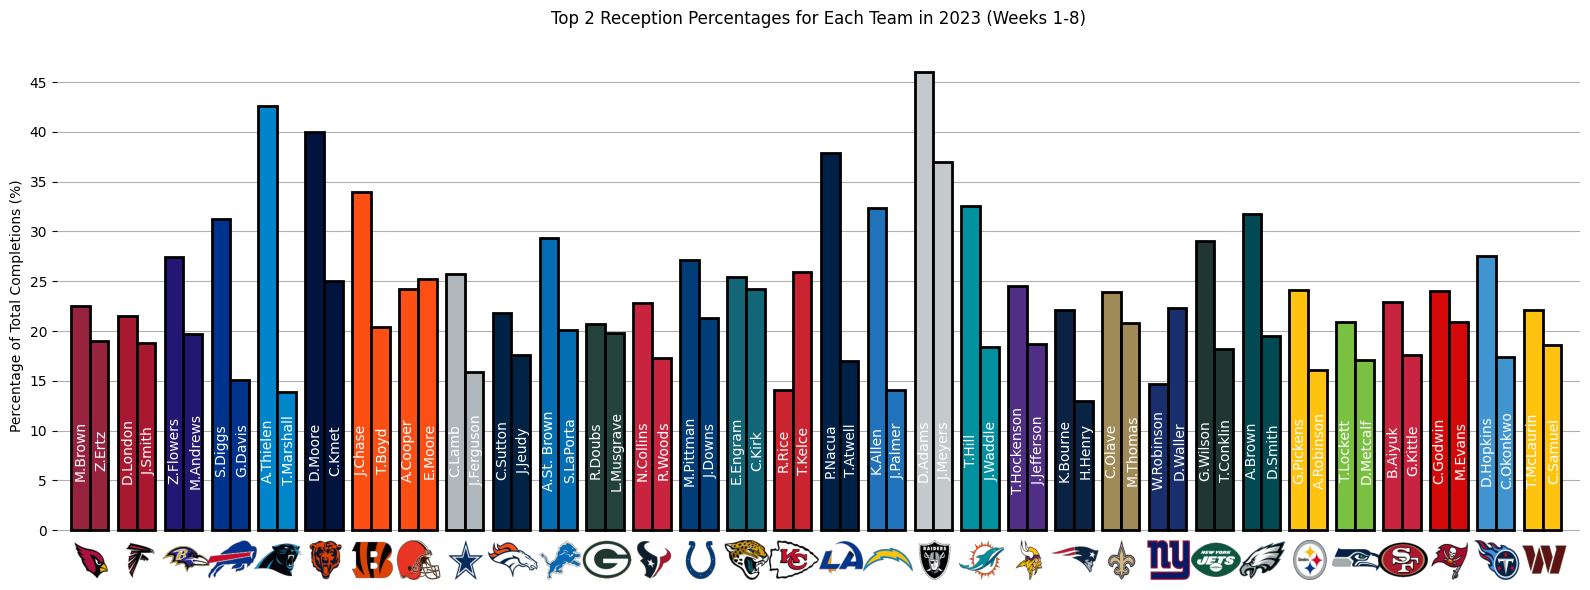

In [ ]:
# Get the list of teams and their corresponding index
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in rec_ngs_piv["team_abbr"]]

logo_images = []

for team in rec_ngs_piv["team_abbr"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.4  # Width of each bar
fig, ax = plt.subplots(figsize=(16, 6))

for i, reciever in enumerate(['rec1', 'rec2']):
    recieve = rec_ngs_piv["rec_percent"][reciever]
    ax.bar([pos + i * width for pos in range(len(rec_ngs_piv["team_abbr"]))], recieve, width=width, label=reciever, color=tm_colors, edgecolor='black', linewidth=2, zorder=5)

for i in range(len(target_ngs_piv["team_abbr"])):
  plt.text(i, 8, rec_ngs_piv["player_short_name"]["rec1"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)
  plt.text(i+0.45, 8, rec_ngs_piv["player_short_name"]["rec2"][i], ha='center', va='center', color='w', rotation=90, fontsize=10, zorder = 10)

for i in range(len(rec_ngs_piv["team_abbr"])):

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i- 0.3,i + 0.75, -5 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Completions (%)')
ax.set_title('Top 2 Reception Percentages for Each Team in 2023 (Weeks 1-8)')

plt.ylim([-5, 50])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 50, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

TOP EPA/Play by Offensive team and personnel

In [ ]:
form_pbp = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [ ]:
form_pbp_group = form_pbp.groupby(["posteam", "offense_formation"])["epa"].sum().reset_index()
play_group = form_pbp.groupby(["posteam","offense_formation"]).size().reset_index(name = "plays")

play_group = play_group[play_group["plays"] >= 30]

form_pbp_group["epa/play"] = form_pbp_group["epa"] / play_group["plays"]

form_pbp_group = form_pbp_group.dropna()
form_pbp_ranked = form_pbp_group.sort_values("epa/play", ascending=False)

best_pbp = form_pbp_ranked.head(10)
worst_pbp = form_pbp_ranked.tail(10)

best_worst_pbp = pd.concat([best_pbp, worst_pbp]).reset_index(drop = True)

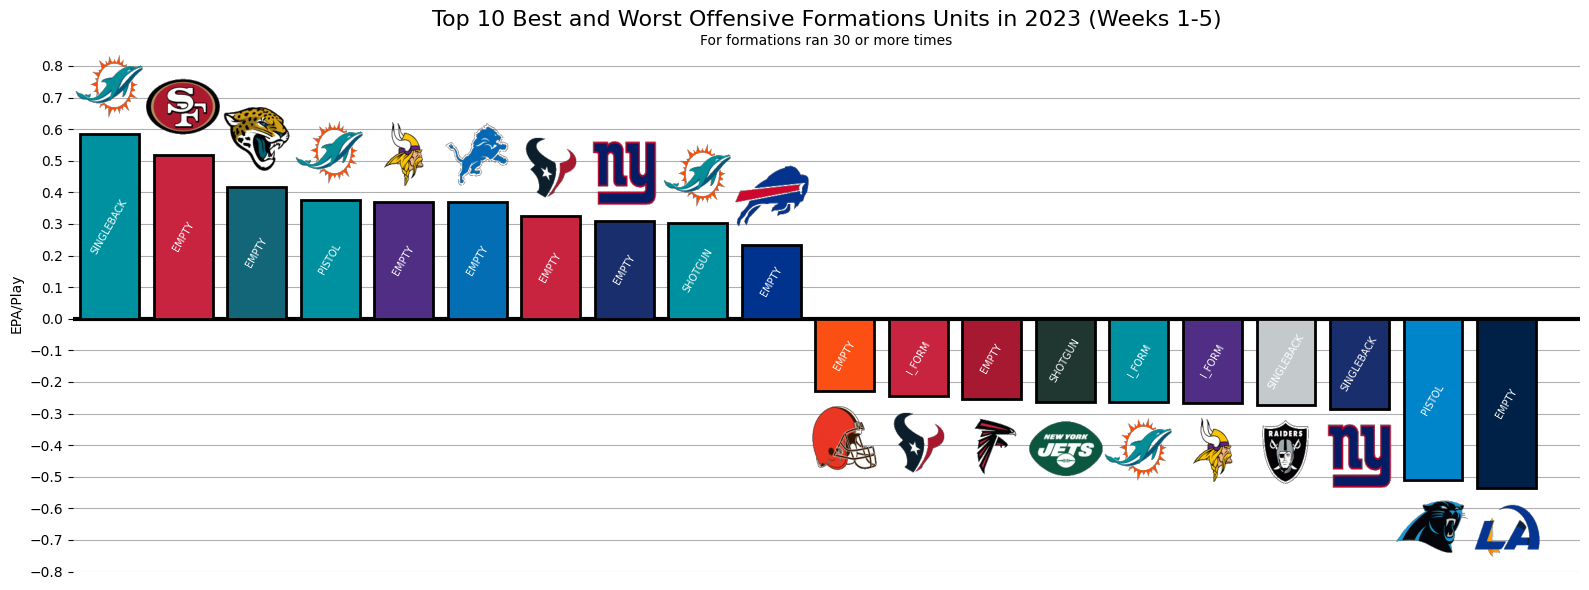

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

tm_colors = [teamcolor.get(team) for team in best_worst_pbp["posteam"]]

logo_images = []

for team in best_worst_pbp["posteam"]:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(best_worst_pbp.index, best_worst_pbp["epa/play"], width=0.8, label=location, color=tm_colors, edgecolor='black', linewidth=2, zorder = 5)

plt.axhline(0, color='black', linewidth = 3)

# Add count
for i in range(len(best_worst_pbp["posteam"])):
  if (best_worst_pbp["epa/play"][i] > 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)
  if (best_worst_pbp["epa/play"][i] < 0):
    plt.text(i, best_worst_pbp["epa/play"][i] / 2, best_worst_pbp["offense_formation"][i], ha='center', va='center', rotation = 60, color='w', fontsize=7, zorder = 30)

# Add logo
for i in range(len(best_worst_pbp["posteam"])):

    logo_img = logo_images[i]

    if (best_worst_pbp["epa/play"][i] > 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] + 0.05 , best_worst_pbp["epa/play"][i] + 0.25], aspect='auto', zorder=7)
    if (best_worst_pbp["epa/play"][i] < 0):
      plt.imshow(logo_img, extent=[i-0.5,i + 0.5, best_worst_pbp["epa/play"][i] - 0.25 , best_worst_pbp["epa/play"][i] - 0.05], aspect='auto', zorder=7)


ax.set_ylabel('EPA/Play')

# Add a main title
ax.set_title('Top 10 Best and Worst Offensive Formations Units in 2023 (Weeks 1-5)', fontsize=16)

# Add a subtitle
subtitle = 'For formations ran 30 or more times'
plt.text(0.5, 0.98, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.ylim(-0.8,0.9)
plt.xlim([-0.5, 20])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks(np.arange(-0.8,0.9, 0.1))

ax.grid(zorder=0)

# Show the plot
plt.tight_layout()
plt.show()